<a href="https://colab.research.google.com/github/kimanh21202/kimanh_ML2023/blob/main/Lab_7_20130197_NguyenThiKimAnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# codeimport pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab'

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import AgglomerativeClustering
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import svm
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.fixes import sklearn
from sklearn import metrics as m
from sklearn import tree 
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import cross_validate
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

import scipy.cluster.hierarchy as sch

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:
#code
iris = datasets.load_iris()
x = iris.data
y = iris.target
s = SVC(kernel='sigmoid')
X_train, X_test, y_train, y_test= tts(x, y, test_size=0.3, random_state=1)
sc = cross_validate(s, X_train, y_train,scoring='accuracy', cv=10)
print(sorted(sc.keys()))
print(np.mean(sc['test_score']))

['fit_time', 'score_time', 'test_score']
0.21727272727272728


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [3]:
#code
iris = datasets.load_iris()
x = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
sca = cross_validate(rfc, X_train, y_train,scoring='accuracy', cv=10)
print(sorted(sca.keys()))
print(np.mean(sca['test_score']))

['fit_time', 'score_time', 'test_score']
0.9249999999999998


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [6]:
# code
data= datasets.load_digits()
kmeans = KMeans(n_clusters = 10, random_state = 1)
kmeans.fit(data['data'])
clusters = kmeans.predict(data['data'])
print(kmeans.cluster_centers_.shape)
     

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)


In [5]:
labels = np.zeros_like(clusters)
acc = m.accuracy_score(data.target, labels)
pres = m.precision_score(data.target, labels, average='macro')
recall = m.recall_score(data.target, labels, average='macro')
f1 = m.f1_score(data.target, labels, average='macro')
KM = ('KMeans', round(acc, 2), round(pres, 2),round(recall, 2),round(f1, 2))
print('Accuracy:', acc)
print('Precision:', pres)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.09905397885364496
Precision: 0.009905397885364497
Recall: 0.1
F1: 0.018025316455696203


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [7]:
# code
NB=['Navie Bayes']
X_train, y_train = data['data'], data['target']
clf = BernoulliNB()
acc = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=10).mean()
pres= cross_val_score(clf,X_train,y_train, scoring='precision_macro',cv=10).mean()
recall= cross_val_score(clf,X_train,y_train, scoring='recall_macro',cv=10).mean()
f1= cross_val_score(clf,X_train,y_train, scoring='f1_macro',cv=10).mean()
NB.append(str(round(acc,2)))
NB.append(str(round(pres,2)))
NB.append(str(round(recall,2)))
NB.append(str(round(f1,2)))
print('Accuracy:',acc)
print('Precision:',pres)
print('Recall:',recall)
print('F1:',f1)


Accuracy: 0.8325170701427685
Precision: 0.8441557756747722
Recall: 0.8329566563467491
F1: 0.8282648275640504


In [18]:
# Random forest
RF=['Random Forest']
clf=RandomForestClassifier() 
acc = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=10).mean()
pres= cross_val_score(clf,X_train,y_train, scoring='precision_macro',cv=10).mean()
recall= cross_val_score(clf,X_train,y_train, scoring='recall_macro',cv=10).mean()
f1= cross_val_score(clf,X_train,y_train, scoring='f1_macro',cv=10).mean()
RF.append(str(round(acc,2)))
RF.append(str(round(pres,2)))
RF.append(str(round(recall,2)))
RF.append(str(round(f1,2)))
print('Accuracy:',acc)
print('Precision:',pres)
print('Recall:',recall)
print('F1:',f1)

Accuracy: 0.9549099937926753
Precision: 0.9552993078902521
Recall: 0.9516580667354662
F1: 0.947718051413769


In [10]:
#KNN
acc=[]
pre =[]
recall=[]
f1=[]
k_range = range(1,10,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  acc.append(cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=10).mean())
  pre.append(cross_val_score(clf,X_train,y_train, scoring='precision_macro',cv=10).mean())
  recall.append(cross_val_score(clf,X_train,y_train, scoring='recall_macro',cv=10).mean())
  f1.append(cross_val_score(clf,X_train,y_train, scoring='f1_macro',cv=10).mean())
print('Accuracy:',acc)
print('Precision:',pres)
print('Recall:',recall)
print('F1:',f1)
 
KNN = ['KNN', str(round(acc[0],2)), str(round(pre[0],2)), str(round(recall[0],2)), str(round(f1[0],2))]

Accuracy: [0.9460148975791434, 0.9488081936685289, 0.9499037864680322, 0.9482402234636871, 0.9487988826815641]
Precision: 0.9555956585012482
Recall: [0.9527038183694531, 0.9498280013759892, 0.9464361885104919, 0.9532370141038873, 0.9416150670794634]
F1: [0.9510975690568142, 0.9494565601892825, 0.9483656632231782, 0.9485726024108961, 0.9493831966626646]


In [17]:
acc=[]
pre =[]
recall=[]
f1=[]
k_range = range(1,10,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  acc.append(cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=10).mean())
  pre.append(cross_val_score(clf,X_train,y_train, scoring='precision_macro',cv=10).mean())
  recall.append(cross_val_score(clf,X_train,y_train, scoring='recall_macro',cv=10).mean())
  f1.append(cross_val_score(clf,X_train,y_train, scoring='f1_macro',cv=10).mean())
print('Accuracy:',acc)
print('Precision:',pres)
print('Recall:',recall)
print('F1:',f1)
 

Accuracy: [0.9482340161390439, 0.9482402234636871, 0.9554717566728739, 0.950471756672874, 0.9510180012414648]
Precision: 0.9555956585012482
Recall: [0.9494547643618851, 0.9511678706570347, 0.9459717922256621, 0.9444908840729275, 0.9498606811145512]
F1: [0.9459464294859139, 0.9474185652542462, 0.9499285003229797, 0.9477144884501391, 0.9470325528932042]


In [ ]:
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_row(KM)
t.add_row(RF)
t.add_row(KNN)
t.add_row(NB)
print(t)

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

[7 9 4 ... 4 1 4]
0.8790955851724198


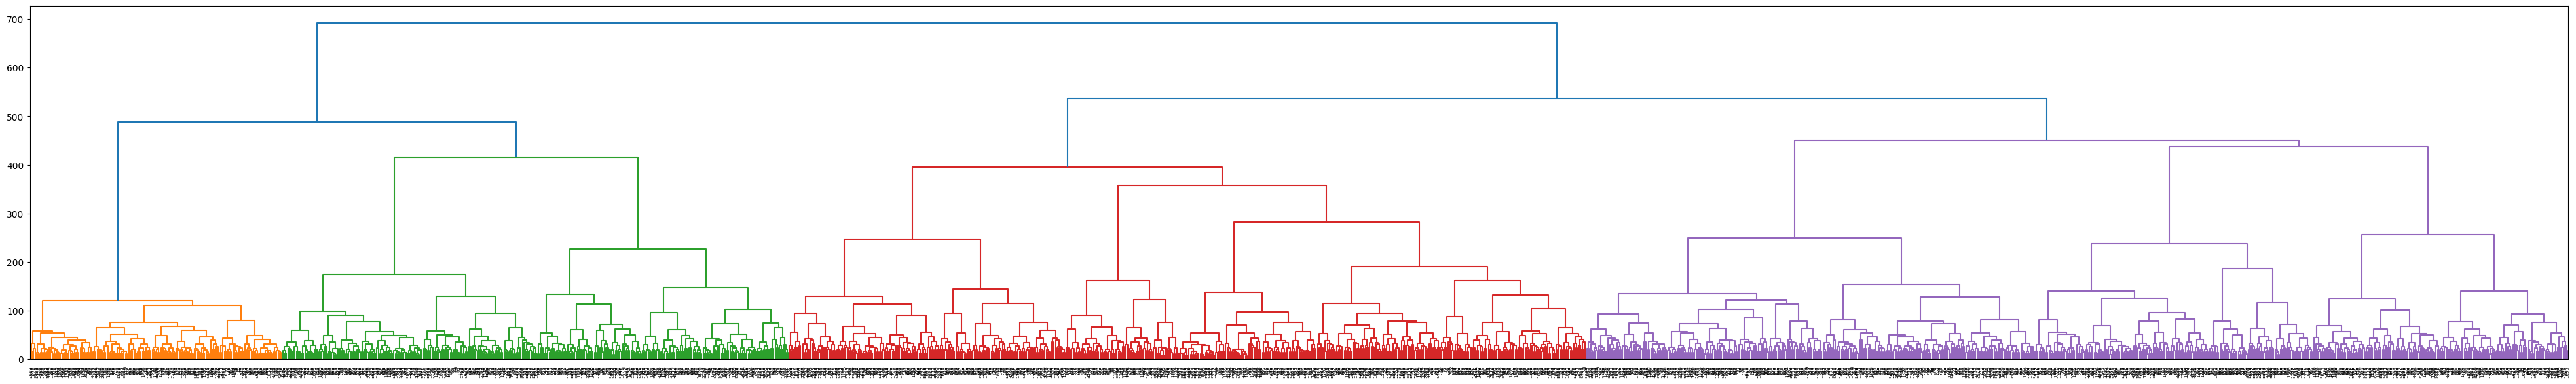

In [15]:
AC = AgglomerativeClustering(n_clusters=10)
AC.fit_predict(data['data'])
print(AC.labels_)
print(m.cluster.completeness_score(data['target'], AC.labels_))
plt.figure(figsize=(50, 7))
dend = sch.dendrogram(sch.linkage(data.data, method='ward'))
     

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.